In [2]:
import numpy as np
import pandas as pd

In [25]:
data  = pd.read_csv('dataset/data_cleaned.csv')

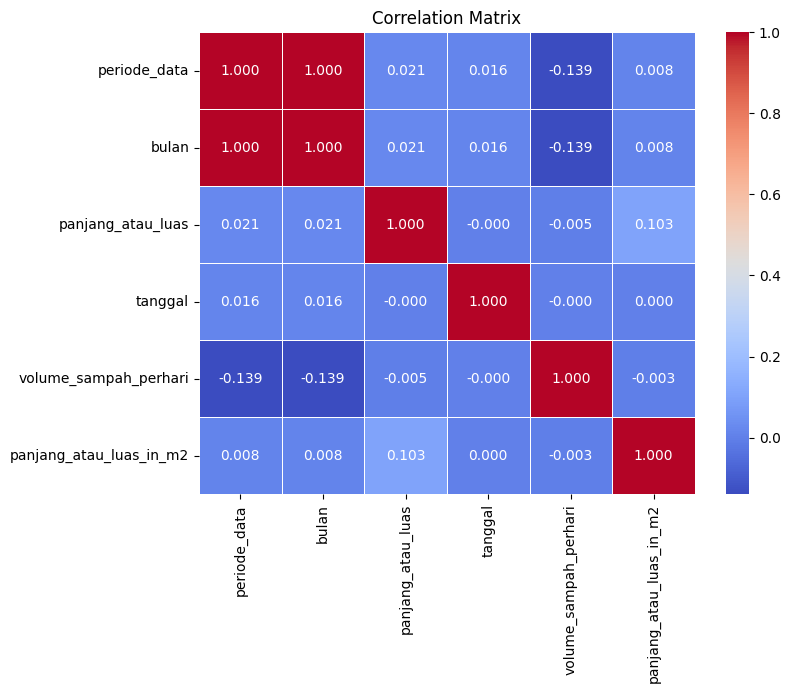

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data  = pd.read_csv('dataset/data_cleaned.csv')
# View correlation between columns
correlation_matrix = data.select_dtypes(include="number").corr()

# Visualizing the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [4]:
data.head()

,periode_data,bulan,titik_lokasi,kecamatan,wilayah,panjang_atau_luas,satuan_panjang_luas,tanggal,volume_sampah_perhari,panjang_atau_luas_in_m2
0,202101,1,Kali / Sungai Ciliwung Jl. Antara - Pasar Baru...,Sawah Besar,Jakarta Pusat,600.0,m,1,12.0,600.0
1,202101,1,Kali / Sungai Ciliwung Kota Jl. Hayam Wuruk,Sawah Besar,Jakarta Pusat,300.0,m,1,0.0,300.0
2,202101,1,Kali / Sungai Ciliwung Ps. Baru Golden Truly,Sawah Besar,Jakarta Pusat,400.0,m,1,12.0,400.0
3,202101,1,Kali / Sungai Ciliwung Kota Jl. Ir. Juanda,Sawah Besar,Jakarta Pusat,300.0,m,1,12.0,300.0
4,202101,1,Kali / Sungai Ciliwung Pangeran Jayakarta,Sawah Besar,Jakarta Pusat,600.0,m,1,12.0,600.0


In [5]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
data['panjang_atau_luas_in_m2_MinMax'] = scaler_minmax.fit_transform(data[['panjang_atau_luas_in_m2']])

# Z-score Standardization
scaler_standard = StandardScaler()
data['panjang_atau_luas_in_m2_ZScore'] = scaler_standard.fit_transform(data[['panjang_atau_luas_in_m2']])

# Menampilkan ringkasan statistik
print(data[['panjang_atau_luas_in_m2', 'panjang_atau_luas_in_m2_MinMax', 'panjang_atau_luas_in_m2_ZScore']].describe())

       panjang_atau_luas_in_m2  panjang_atau_luas_in_m2_MinMax  \
count             6.321970e+05                   632197.000000   
mean              3.600561e+04                        0.000196   
std               2.183499e+06                        0.011888   
min               0.000000e+00                        0.000000   
25%               2.900000e+02                        0.000002   
50%               6.000000e+02                        0.000003   
75%               1.000000e+03                        0.000005   
max               1.836800e+08                        1.000000   

       panjang_atau_luas_in_m2_ZScore  
count                    6.321970e+05  
mean                     3.883165e-18  
std                      1.000001e+00  
min                     -1.648988e-02  
25%                     -1.635707e-02  
50%                     -1.621509e-02  
75%                     -1.603190e-02  
max                      8.410543e+01  


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [14]:
# Misalnya, dataset sudah dibaca dalam variabel `data`
X = data[['panjang_atau_luas_in_m2_MinMax']]  # Fitur (independent variable)
y = data['volume_sampah_perhari']      # Target (dependent variable

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Membuat model regresi linear
model = LinearRegression()

# Melatih model
model.fit(X_train, y_train)


LinearRegression()

In [17]:
y_pred = model.predict(X_test)


In [18]:
# Menampilkan metrik evaluasi
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 1.6597764327558493
Mean Squared Error (MSE): 21.2336434939135
Root Mean Squared Error (RMSE): 4.607997774946674
R² Score: 2.8760930308457944e-06


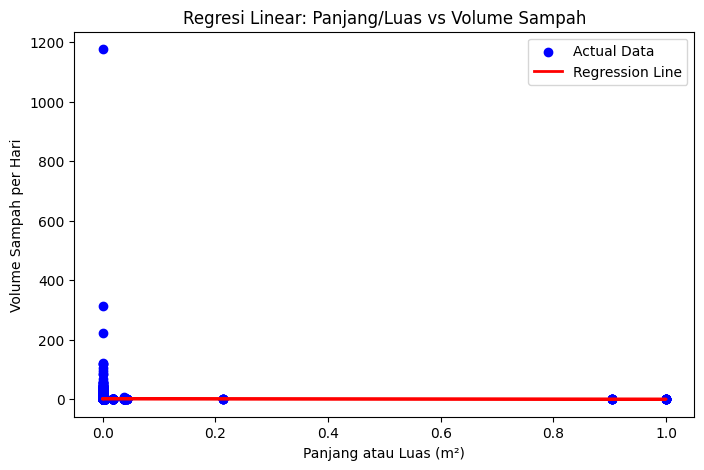

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label="Actual Data")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel("Panjang atau Luas (m²)")
plt.ylabel("Volume Sampah per Hari")
plt.title("Regresi Linear: Panjang/Luas vs Volume Sampah")
plt.legend()
plt.show()


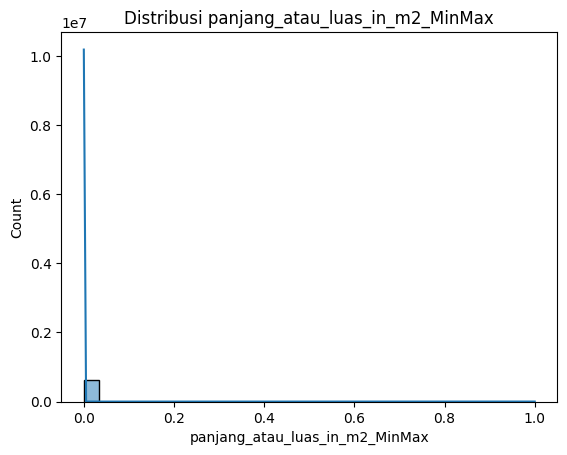

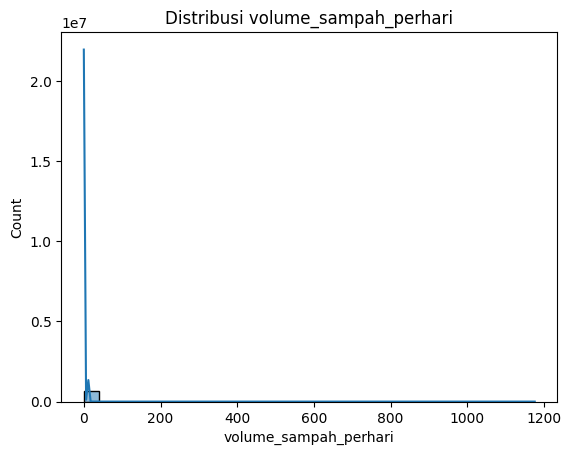

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi fitur X
sns.histplot(data['panjang_atau_luas_in_m2_MinMax'], bins=30, kde=True)
plt.title("Distribusi panjang_atau_luas_in_m2_MinMax")
plt.show()

# Visualisasi distribusi target Y
sns.histplot(data['volume_sampah_perhari'], bins=30, kde=True)
plt.title("Distribusi volume_sampah_perhari")
plt.show()


In [21]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


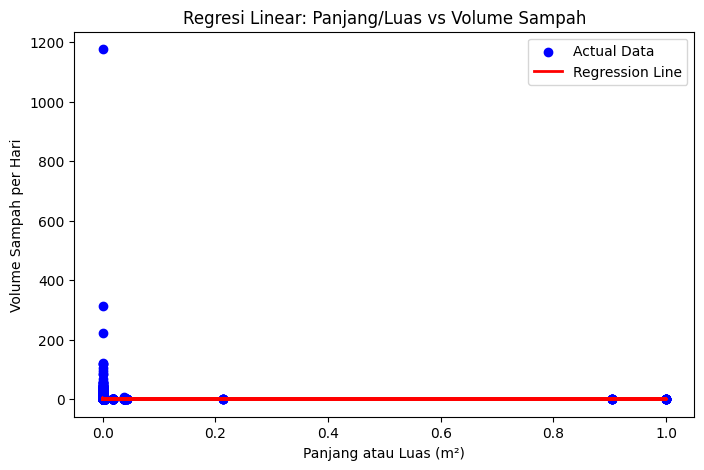

In [22]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label="Actual Data")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel("Panjang atau Luas (m²)")
plt.ylabel("Volume Sampah per Hari")
plt.title("Regresi Linear: Panjang/Luas vs Volume Sampah")
plt.legend()
plt.show()

In [23]:
import numpy as np
data['panjang_atau_luas_log'] = np.log1p(data['panjang_atau_luas_in_m2_MinMax'])
